In [1]:
import pandas as pd
data = pd.read_csv("Zillow_Airbnb.csv")

In [2]:
data

,Unnamed: 0,RegionID,SizeRank,City,RegionType,StateName,Date,ZHVI,Listings
0,0,394355,29,"Austin, TX",msa,TX,2000-01-31,167608.803584,0
1,1,394355,29,"Austin, TX",msa,TX,2000-02-29,168157.892276,0
2,2,394355,29,"Austin, TX",msa,TX,2000-03-31,168656.684383,0
3,3,394355,29,"Austin, TX",msa,TX,2000-04-30,169450.508196,0
4,4,394355,29,"Austin, TX",msa,TX,2000-05-31,170048.593123,0
...,...,...,...,...,...,...,...,...,...
4721,4721,753899,2,"Los Angeles, CA",msa,CA,2022-10-31,887956.929337,14349
4722,4722,753899,2,"Los Angeles, CA",msa,CA,2022-11-30,884296.450518,13785
4723,4723,753899,2,"Los Angeles, CA",msa,CA,2022-12-31,880012.047421,13042
4724,4724,753899,2,"Los Angeles, CA",msa,CA,2023-01-31,871774.871645,11029


In [3]:
grouped = data.groupby(data['City'])

In [4]:
groupdict = {}
for val in set(data['City'].values):
    groupdict[val] = grouped.get_group(val)

In [5]:
listings = []
for key in set(groupdict.keys()):
    listings.append(groupdict[key].iloc[groupdict[key]['Listings'].to_numpy().nonzero()[0]].iloc[0]['Date'])

In [6]:
for key in set(groupdict.keys()):
    groupdict[key]['Date'] = pd.to_datetime(groupdict[key]['Date'], format='%Y-%m-%d')

<ipython-input-6-d679a6aa6089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupdict[key]['Date'] = pd.to_datetime(groupdict[key]['Date'], format='%Y-%m-%d')


In [7]:
for key in set(groupdict.keys()):
    groupdict[key] = groupdict[key][groupdict[key]['Date'] >= '2011-12-31']

In [8]:
groupdict['New York, NY']

,Unnamed: 0,RegionID,SizeRank,City,RegionType,StateName,Date,ZHVI,Listings
2645,2645,394913,1,"New York, NY",msa,NY,2011-12-31,306810.531118,258
2646,2646,394913,1,"New York, NY",msa,NY,2012-01-31,305661.124864,276
2647,2647,394913,1,"New York, NY",msa,NY,2012-02-29,304992.215234,282
2648,2648,394913,1,"New York, NY",msa,NY,2012-03-31,305065.564329,300
2649,2649,394913,1,"New York, NY",msa,NY,2012-04-30,305701.837400,329
...,...,...,...,...,...,...,...,...,...
2775,2775,394913,1,"New York, NY",msa,NY,2022-10-31,563198.956329,13872
2776,2776,394913,1,"New York, NY",msa,NY,2022-11-30,561477.222533,13443
2777,2777,394913,1,"New York, NY",msa,NY,2022-12-31,559150.425251,11948
2778,2778,394913,1,"New York, NY",msa,NY,2023-01-31,559116.909909,7750


In [9]:
for key in set(groupdict.keys()):
    groupdict[key] = groupdict[key].drop(columns = ['Unnamed: 0', 'RegionID', 'SizeRank', 'City', 'RegionType', 'StateName'])

In [10]:
rate = pd.read_csv("FEDFUNDS.csv")
cpi = pd.read_csv("CPIAUCSL.csv")
unrate = pd.read_csv("UNRATE.csv")

In [11]:
rate['DATE'] = pd.to_datetime(rate['DATE'], format='%m/%d/%y')
cpi['DATE'] = pd.to_datetime(cpi['DATE'], format='%m/%d/%y')
unrate['DATE'] = pd.to_datetime(unrate['DATE'], format='%m/%d/%y')

In [12]:
for key in set(groupdict.keys()):
    groupdict[key] = groupdict[key].merge(rate, left_on = 'Date', right_on = 'DATE')
    groupdict[key] = groupdict[key].drop(columns = ['DATE', 'DATE'])
    groupdict[key] = groupdict[key].merge(cpi, left_on = 'Date', right_on = 'DATE')
    groupdict[key] = groupdict[key].drop(columns = ['DATE'])
    groupdict[key] = groupdict[key].merge(unrate, left_on = 'Date', right_on = 'DATE')
    groupdict[key] = groupdict[key].drop(columns = ['DATE'])

In [13]:
diffdict = {}
for key in set(groupdict.keys()):
    diffdict[key] = groupdict[key].copy()

In [14]:
diffdict['Dallas, TX']

,Date,ZHVI,Listings,FEDFUNDS,CPIAUCSL,UNRATE
0,2011-12-31,140819.512408,1,0.08,227.842,8.3
1,2012-01-31,140536.402478,1,0.10,228.329,8.3
2,2012-02-29,140690.611037,1,0.13,228.807,8.2
3,2012-03-31,141151.845293,1,0.14,229.187,8.2
4,2012-04-30,141832.248579,1,0.16,228.713,8.2
...,...,...,...,...,...,...
130,2022-10-31,372512.410198,2794,3.78,298.598,3.6
131,2022-11-30,370635.750644,2776,4.10,298.990,3.5
132,2022-12-31,368144.107192,2697,4.33,300.536,3.4
133,2023-01-31,365604.408379,2237,4.57,301.648,3.6


In [15]:
for key in set(diffdict.keys()):
    diffdict[key]['ZHVI'] = diffdict[key]['ZHVI'].diff()
    diffdict[key]['Listings'] = diffdict[key]['Listings'].diff()
    diffdict[key]['FEDFUNDS'] = diffdict[key]['FEDFUNDS'].diff()
    diffdict[key]['CPIAUCSL'] = diffdict[key]['CPIAUCSL'].diff()
    diffdict[key]['UNRATE'] = diffdict[key]['UNRATE'].diff()
    diffdict[key] = diffdict[key][diffdict[key]['Date'] > '2011-12-31']

In [16]:
reg_xs = {}
reg_ys = {}
for key in set(groupdict.keys()):
    reg_xs[key] = groupdict[key].drop(columns = ['Date', 'ZHVI'])
    reg_ys[key] = groupdict[key]['ZHVI']

In [17]:
diff_xs = {}
diff_ys = {}
for key in set(groupdict.keys()):
    diff_xs[key] = diffdict[key].drop(columns = ['Date', 'ZHVI'])
    diff_ys[key] = diffdict[key]['ZHVI']

In [18]:
import statsmodels.api as sm
reg_models = {}
p_values_reg = {}
R_sq_reg = {}
summaries_reg = {}
for key in set(groupdict.keys()):
    reg_models[key] = sm.OLS(reg_ys[key],reg_xs[key])
    fii = reg_models[key].fit()
    p_values_reg[key] = fii.summary2().tables[1]['P>|t|']
    R_sq_reg[key] = fii.summary2().tables[0][1][6]
    summaries_reg[key] = fii.summary()

In [19]:
import statsmodels.api as sm
diff_models = {}
p_values_diff = {}
R_sq_diff = {}
summaries_diff = {}
for key in set(groupdict.keys()):
    diff_models[key] = sm.OLS(diff_ys[key],diff_xs[key])
    fii = diff_models[key].fit()
    p_values_diff[key] = fii.summary2().tables[1]['P>|t|']
    R_sq_diff[key] = fii.summary2().tables[0][1][6]
    summaries_diff[key] = fii.summary()

In [20]:
summaries_reg

{'Denver, CO': <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:                   ZHVI   R-squared (uncentered):                   0.995
 Model:                            OLS   Adj. R-squared (uncentered):              0.994
 Method:                 Least Squares   F-statistic:                              6083.
 Date:                Thu, 20 Apr 2023   Prob (F-statistic):                   1.14e-147
 Time:                        17:45:05   Log-Likelihood:                         -1581.7
 No. Observations:                 135   AIC:                                      3171.
 Df Residuals:                     131   BIC:                                      3183.
 Df Model:                           4                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t  

In [21]:
scaled_reg_xs = {}
scaled_reg_ys = {}
scaled_diff_xs = {}
scaled_diff_ys = {}
for key in set(groupdict.keys()):
    scaled_reg_xs[key] = (reg_xs[key]-reg_xs[key].mean())/reg_xs[key].std()
    scaled_reg_ys[key] = (reg_ys[key]-reg_ys[key].mean())/reg_ys[key].std()
    scaled_diff_xs[key] = (diff_xs[key]-diff_xs[key].mean())/diff_xs[key].std()
    scaled_diff_ys[key] = (diff_ys[key]-diff_ys[key].mean())/diff_ys[key].std()

In [22]:
reg_models_scaled = {}
p_values_reg_scaled = {}
R_sq_reg_scaled = {}
summaries_reg_scaled = {}
for key in set(groupdict.keys()):
    reg_models_scaled[key] = sm.OLS(scaled_reg_ys[key],scaled_reg_xs[key])
    fii = reg_models_scaled[key].fit()
    p_values_reg_scaled[key] = fii.summary2().tables[1]['P>|t|']
    R_sq_reg_scaled[key] = fii.summary2().tables[0][1][6]
    summaries_reg_scaled[key] = fii.summary()

In [23]:
diff_models_scaled = {}
p_values_diff_scaled = {}
R_sq_diff_scaled = {}
summaries_diff_scaled = {}
for key in set(groupdict.keys()):
    diff_models_scaled[key] = sm.OLS(scaled_diff_ys[key],scaled_diff_xs[key])
    fii = diff_models_scaled[key].fit()
    p_values_diff_scaled[key] = fii.summary2().tables[1]['P>|t|']
    R_sq_diff_scaled[key] = fii.summary2().tables[0][1][6]
    summaries_diff_scaled[key] = fii.summary()

In [24]:
summaries_diff_scaled

{'Denver, CO': <class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:                   ZHVI   R-squared (uncentered):                   0.292
 Model:                            OLS   Adj. R-squared (uncentered):              0.270
 Method:                 Least Squares   F-statistic:                              13.41
 Date:                Thu, 20 Apr 2023   Prob (F-statistic):                    3.54e-09
 Time:                        17:45:05   Log-Likelihood:                         -166.49
 No. Observations:                 134   AIC:                                      341.0
 Df Residuals:                     130   BIC:                                      352.6
 Df Model:                           4                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t  

In [25]:
scaled_reg_xs['Dallas, TX']

,Listings,FEDFUNDS,CPIAUCSL,UNRATE
0,-0.788738,-0.693049,-1.194828,1.447261
1,-0.788738,-0.674088,-1.169907,1.447261
2,-0.788738,-0.645647,-1.145447,1.395939
3,-0.788738,-0.636166,-1.126001,1.395939
4,-0.788738,-0.617206,-1.150257,1.395939
...,...,...,...,...
130,2.716202,2.814680,2.425929,-0.964840
131,2.693614,3.118051,2.445989,-1.016162
132,2.594477,3.336099,2.525101,-1.067483
133,2.017222,3.563628,2.582005,-0.964840


## Time Series

In [26]:
groupdict['Dallas, TX']['Date'].min(), groupdict['Dallas, TX']['Date'].max()

(Timestamp('2011-12-31 00:00:00'), Timestamp('2023-02-28 00:00:00'))

In [27]:
groupdict['Dallas, TX']

,Date,ZHVI,Listings,FEDFUNDS,CPIAUCSL,UNRATE
0,2011-12-31,140819.512408,1,0.08,227.842,8.3
1,2012-01-31,140536.402478,1,0.10,228.329,8.3
2,2012-02-29,140690.611037,1,0.13,228.807,8.2
3,2012-03-31,141151.845293,1,0.14,229.187,8.2
4,2012-04-30,141832.248579,1,0.16,228.713,8.2
...,...,...,...,...,...,...
130,2022-10-31,372512.410198,2794,3.78,298.598,3.6
131,2022-11-30,370635.750644,2776,4.10,298.990,3.5
132,2022-12-31,368144.107192,2697,4.33,300.536,3.4
133,2023-01-31,365604.408379,2237,4.57,301.648,3.6


In [28]:
tsdict = {}
for key in set(groupdict.keys()):
    tsdict[key] = groupdict[key].set_index('Date')
tsdict['Dallas, TX']

,ZHVI,Listings,FEDFUNDS,CPIAUCSL,UNRATE
Date,,,,,
2011-12-31,140819.512408,1,0.08,227.842,8.3
2012-01-31,140536.402478,1,0.10,228.329,8.3
2012-02-29,140690.611037,1,0.13,228.807,8.2
2012-03-31,141151.845293,1,0.14,229.187,8.2
2012-04-30,141832.248579,1,0.16,228.713,8.2
...,...,...,...,...,...
2022-10-31,372512.410198,2794,3.78,298.598,3.6
2022-11-30,370635.750644,2776,4.10,298.990,3.5
2022-12-31,368144.107192,2697,4.33,300.536,3.4


In [29]:
y = tsdict['Dallas, TX']['ZHVI']
y

Date
2011-12-31    140819.512408
2012-01-31    140536.402478
2012-02-29    140690.611037
2012-03-31    141151.845293
2012-04-30    141832.248579
                  ...      
2022-10-31    372512.410198
2022-11-30    370635.750644
2022-12-31    368144.107192
2023-01-31    365604.408379
2023-02-28    363545.511501
Name: ZHVI, Length: 135, dtype: float64

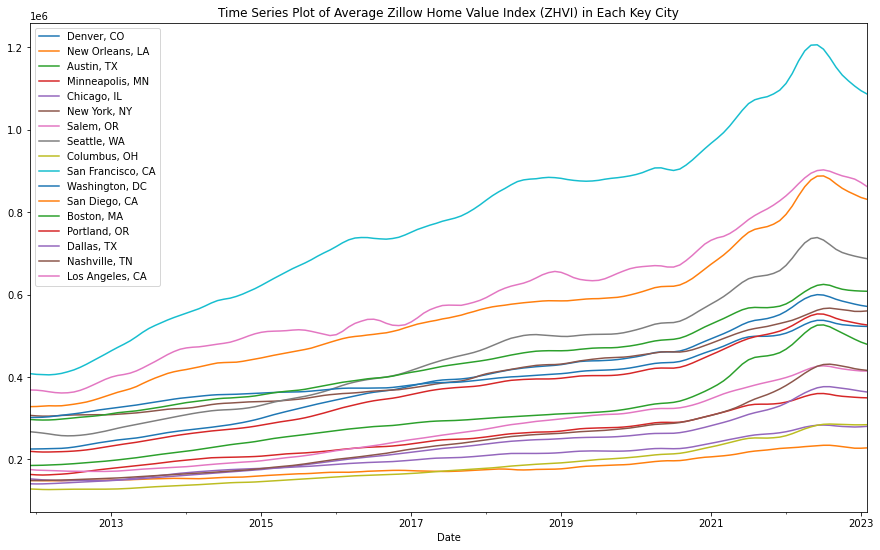

In [30]:
import matplotlib.pyplot as plt
for key in set(groupdict.keys()):
    y = tsdict[key]['ZHVI']
    y.plot(figsize=(15,9),label = key)
plt.legend(loc="upper left")
plt.title("Time Series Plot of Average Zillow Home Value Index (ZHVI) in Each Key City")
plt.show()

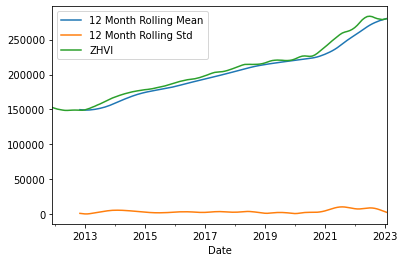

In [31]:
timeseries = tsdict['Chicago, IL']['ZHVI']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend() 

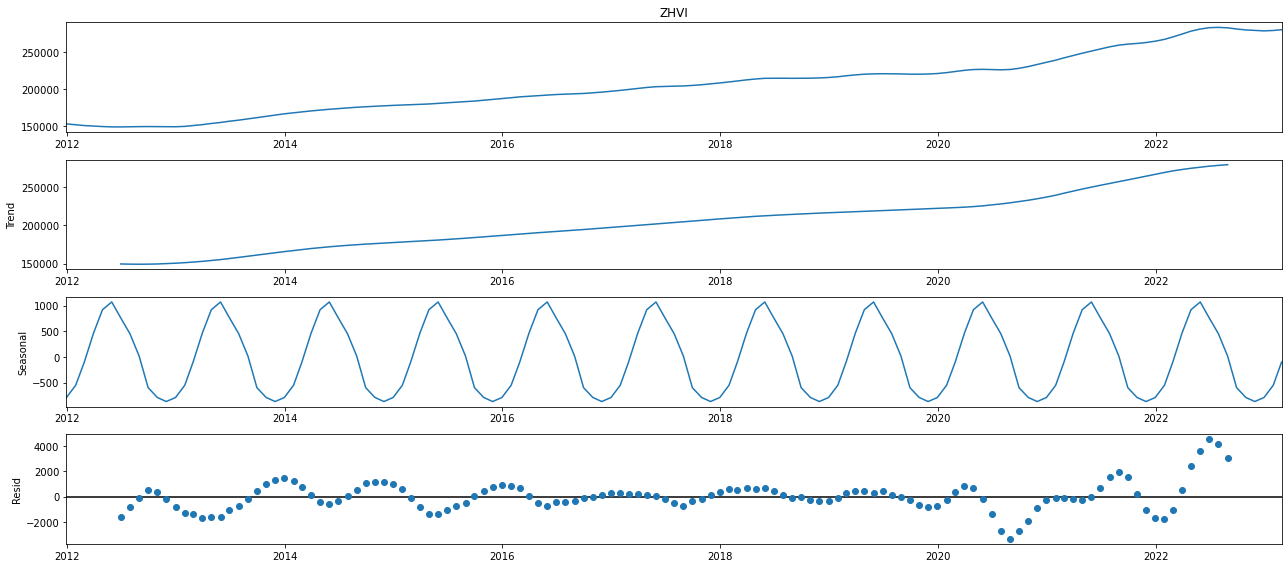

In [32]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
y = tsdict['Chicago, IL']['ZHVI']
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#positive trend, seasonality, noisy at end of sample (for multiple cities)

In [33]:
from statsmodels.tsa.stattools import adfuller
for key in set(tsdict.keys()):
    test_result = adfuller(tsdict[key]['ZHVI'])
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

    for value,label in zip(test_result,labels):
        print (label+': '+str(value))
    if test_result[1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary ")
#all are nonstationary so we can take the difference to make the data stationary

ADF Test:
ADF Statistic: -0.38964572832835237
p-value: 0.911813268575965
No. of Lags Used: 11
Number of Observations Used: 123
Fail to reject H0 thereby data is non-stationary 
ADF Test:
ADF Statistic: 0.4718025233494775
p-value: 0.9839903841349891
No. of Lags Used: 5
Number of Observations Used: 129
Fail to reject H0 thereby data is non-stationary 
ADF Test:
ADF Statistic: -0.2777099944040982
p-value: 0.9286024734141489
No. of Lags Used: 11
Number of Observations Used: 123
Fail to reject H0 thereby data is non-stationary 
ADF Test:
ADF Statistic: 0.06698090548350051
p-value: 0.9637330663194422
No. of Lags Used: 8
Number of Observations Used: 126
Fail to reject H0 thereby data is non-stationary 
ADF Test:
ADF Statistic: -0.6570677156029908
p-value: 0.8575588577133185
No. of Lags Used: 11
Number of Observations Used: 123
Fail to reject H0 thereby data is non-stationary 
ADF Test:
ADF Statistic: 0.623645862854418
p-value: 0.9881841871605105
No. of Lags Used: 13
Number of Observations Use

In [34]:
tsdiffdict = {}
for key in set(tsdict.keys()):
    tsdiffdict[key] = tsdict[key]['ZHVI'] - tsdict[key]['ZHVI'].shift(1)
    test_result = adfuller(tsdiffdict[key].dropna())
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

    for value,label in zip(test_result,labels):
        print (label+': '+str(value))
    if test_result[1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary ")

ADF Test:
ADF Statistic: -2.702552553633582
p-value: 0.07359760638088186
No. of Lags Used: 13
Number of Observations Used: 120
Fail to reject H0 thereby data is non-stationary 
ADF Test:
ADF Statistic: -3.196278487287531
p-value: 0.020201108108269476
No. of Lags Used: 4
Number of Observations Used: 129
Reject null hypothesis and data is stationary
ADF Test:
ADF Statistic: -2.1593849958597415
p-value: 0.22131504910813482
No. of Lags Used: 13
Number of Observations Used: 120
Fail to reject H0 thereby data is non-stationary 
ADF Test:
ADF Statistic: -2.768587340187841
p-value: 0.06290282825428493
No. of Lags Used: 13
Number of Observations Used: 120
Fail to reject H0 thereby data is non-stationary 
ADF Test:
ADF Statistic: -2.8125088636185294
p-value: 0.05650906216224064
No. of Lags Used: 13
Number of Observations Used: 120
Fail to reject H0 thereby data is non-stationary 
ADF Test:
ADF Statistic: -2.3210029266065613
p-value: 0.16528355307139797
No. of Lags Used: 13
Number of Observations

In [35]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [36]:
setup = []
y = tsdict["Chicago, IL"]['ZHVI']
min_aic = 100000
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()
            
            if results.aic < min_aic:
                min_aic = results.aic
                setup = [param, param_seasonal, results.aic]
        except:
            continue

/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/s

/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/s

/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/s

/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/danielnagle/opt/anaconda3/lib/python3.8/s

In [37]:
setup

[(1, 1, 1), (0, 1, 1, 12), 1605.1532082046008]

In [38]:
from statsmodels.tools.sm_exceptions import ValueWarning
import warnings
warnings.simplefilter('ignore', ValueWarning)
setup = {}
for key in set(tsdict.keys()):
    y = tsdict[key]['ZHVI']
    min_aic = 100000
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

                results = mod.fit()

                if results.aic < min_aic:
                    min_aic = results.aic
                    setup[key] = param, param_seasonal, min_aic
            except:
                continue


/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaco

/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaco

/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/danielnagle/opt/anaco

In [39]:
setup

{'Denver, CO': ((1, 1, 1), (1, 1, 1, 12), 1759.5335609420774),
 'New Orleans, LA': ((1, 1, 1), (1, 1, 1, 12), 1651.2985954330516),
 'Minneapolis, MN': ((1, 1, 1), (1, 1, 1, 12), 1644.2372125989627),
 'Chicago, IL': ((1, 1, 1), (0, 1, 1, 12), 1605.1532082046008),
 'Austin, TX': ((1, 1, 1), (0, 1, 1, 12), 1798.0770976576018),
 'New York, NY': ((1, 1, 1), (0, 1, 1, 12), 1765.0635280023841),
 'Salem, OR': ((1, 1, 1), (0, 1, 1, 12), 1664.3793250295837),
 'Seattle, WA': ((1, 1, 1), (1, 1, 1, 12), 1894.0922986724786),
 'Columbus, OH': ((1, 1, 1), (0, 1, 1, 12), 1600.5884145257914),
 'San Francisco, CA': ((1, 1, 1), (1, 1, 1, 12), 2016.281228688226),
 'Washington, DC': ((1, 1, 1), (1, 1, 1, 12), 1717.6065575829284),
 'Los Angeles, CA': ((1, 1, 1), (1, 1, 1, 12), 1979.0304309633661),
 'Boston, MA': ((1, 1, 1), (1, 1, 1, 12), 1781.125863685276),
 'Portland, OR': ((1, 1, 1), (1, 1, 1, 12), 1737.8331852623326),
 'Dallas, TX': ((1, 1, 1), (1, 1, 1, 12), 1637.730295214287),
 'Nashville, TN': ((1, 1,

In [88]:
ts_models = {}
p_values_ts = {}
R_sq_ts = {}
summaries_ts = {}
fii = {}
y = {}
for key in set(setup.keys()):
    y[key] = tsdict[key]['ZHVI']
    ts_models[key] = sm.tsa.statespace.SARIMAX(y[key], order=setup[key][0], seasonal_order=setup[key][1], enforce_stationarity=False, enforce_invertibility=False)
    fii[key] = ts_models[key].fit()
    summaries_ts[key] = fii[key].summary()

/Users/danielnagle/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [89]:
summaries_ts

{'Denver, CO': <class 'statsmodels.iolib.summary.Summary'>
 """
                                      SARIMAX Results                                      
 Dep. Variable:                               ZHVI   No. Observations:                  135
 Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -874.767
 Date:                            Thu, 20 Apr 2023   AIC                           1759.534
 Time:                                    18:44:53   BIC                           1772.944
 Sample:                                12-31-2011   HQIC                          1764.971
                                      - 02-28-2023                                         
 Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1          0.9662      0.033     29

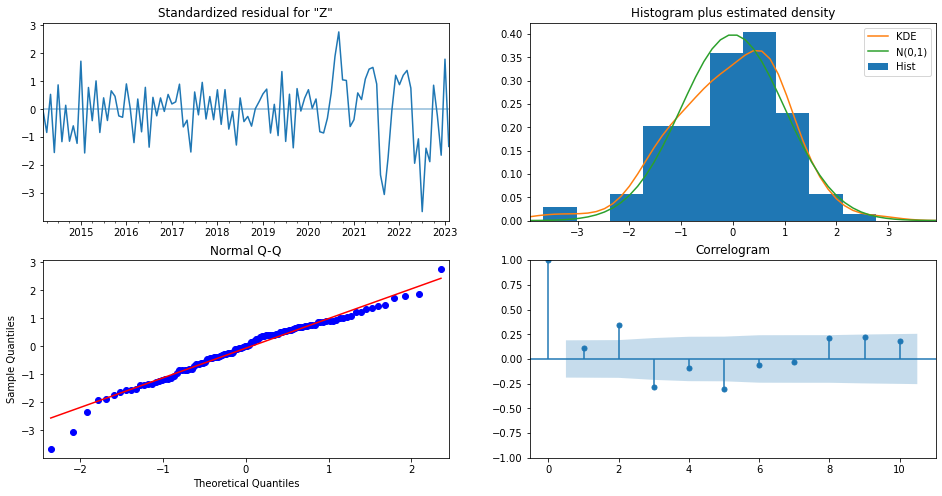

In [90]:
fii['Chicago, IL'].plot_diagnostics(figsize=(16, 8))
plt.show()
#checking if there is unusual behavior.
#data appears to have constant variance, relatively normal distribution and no trend over time (all key for a good TS model)

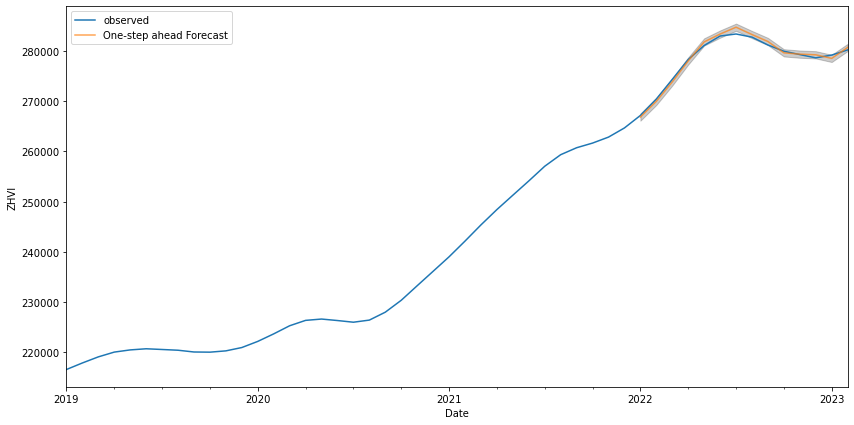

In [92]:
import numpy as np
#only one city's prediction
pred = fii['Chicago, IL'].get_prediction(start=pd.to_datetime('2022-01-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['Chicago, IL']['2019-01-31':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('ZHVI')
plt.legend()
plt.show()

In [105]:
import numpy as np
for key in set(fii.keys()):
    pred = fii[key].get_prediction(start=pd.to_datetime('2022-01-31'), dynamic=False).predicted_mean
    y_truth = y[key]['2022-01-31':]
    mse = ((pred - y_truth) ** 2).mean()

    #print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1314.21
The Root Mean Squared Error of our forecasts is 705.34
The Root Mean Squared Error of our forecasts is 758.64
The Root Mean Squared Error of our forecasts is 599.83
The Root Mean Squared Error of our forecasts is 1568.84
The Root Mean Squared Error of our forecasts is 1118.44
The Root Mean Squared Error of our forecasts is 1040.93
The Root Mean Squared Error of our forecasts is 3014.08
The Root Mean Squared Error of our forecasts is 646.31
The Root Mean Squared Error of our forecasts is 4836.15
The Root Mean Squared Error of our forecasts is 939.19
The Root Mean Squared Error of our forecasts is 3355.94
The Root Mean Squared Error of our forecasts is 1487.15
The Root Mean Squared Error of our forecasts is 1271.97
The Root Mean Squared Error of our forecasts is 960.77
The Root Mean Squared Error of our forecasts is 1228.82
The Root Mean Squared Error of our forecasts is 3369.24


In [96]:
import numpy as np
#all cities predictions
pred = {}
y_forecasted = {}
mse = {}
zhvi_prediction = pd.DataFrame()
mse = pd.DataFrame()
for key in set(fii.keys()):
    pred = fii[key].get_prediction(start=pd.to_datetime('2022-01-31'), dynamic=False).predicted_mean
    zhvi_prediction[key] = pred
    
    y_truth = y[key]['2022-01-31':]
    mse[key] = ((pred - y_truth) ** 2).mean()

In [97]:
pred = fii['Dallas, TX'].get_prediction(start=pd.to_datetime('2022-01-31'), dynamic=False).predicted_mean
pred

2022-01-31    335148.266892
2022-02-28    344102.796888
2022-03-31    352775.957489
2022-04-30    362438.836455
2022-05-31    369146.462778
2022-06-30    374587.757154
2022-07-31    378570.957559
2022-08-31    377506.137610
2022-09-30    375664.457149
2022-10-31    372167.615268
2022-11-30    371326.063108
2022-12-31    368728.684386
2023-01-31    366421.291229
2023-02-28    363273.279175
Freq: M, Name: predicted_mean, dtype: float64

In [98]:
zhvi_prediction

,"Denver, CO","New Orleans, LA","Minneapolis, MN","Chicago, IL","Austin, TX","New York, NY","Salem, OR","Seattle, WA","Columbus, OH","San Francisco, CA","Washington, DC","Los Angeles, CA","Boston, MA","Portland, OR","Dallas, TX","Nashville, TN","San Diego, CA"
2022-01-31,557166.850448,228108.170508,337876.890044,266848.482244,465898.119225,533477.421087,398462.415815,666094.674338,255996.502216,1.105305e+06,505168.264493,835914.791818,574499.186579,515932.340272,335148.266892,378487.836084,789087.100543
2022-02-28,568741.766435,228450.289071,342676.236397,269984.783964,477553.127801,537829.177776,403041.545761,685963.110503,261807.754519,1.132442e+06,511122.937134,850818.530368,584043.170051,523679.206484,344102.796888,388482.122346,811709.132344
2022-03-31,579996.496593,229395.055003,346749.264022,273846.440442,492098.458606,541632.307803,408445.782830,707280.026897,267775.997206,1.163511e+06,519025.498207,865829.395684,594492.370393,532672.859815,352775.957489,398455.289997,836626.133444
2022-04-30,591948.351897,230809.322352,353287.999173,278037.377797,509723.380573,549382.009872,415524.178576,729501.907757,274633.556799,1.200366e+06,528406.771267,888508.627801,608633.482050,542212.099490,362438.836455,409075.576091,866676.997418
2022-05-31,597876.997241,232523.706285,357272.787255,281824.409213,520713.673607,555373.087636,421870.409038,740113.500405,279228.398314,1.210081e+06,534380.875770,894079.046559,615932.746402,550027.080258,369146.462778,419800.229903,881726.074842
2022-06-30,602208.831521,233236.691383,360691.686668,283391.467099,528603.588214,561818.456249,426728.128209,743079.062586,283181.548966,1.215167e+06,539005.017858,907550.654604,623722.070645,554687.328731,374587.757154,427304.072268,892309.047477
2022-07-31,600362.692150,234606.853723,361405.241133,284753.753028,526784.059439,567241.427624,429740.497445,735613.931028,286017.780262,1.198093e+06,538631.659565,902417.407994,625953.720610,555599.971095,378570.957559,433441.683261,891537.916079
2022-08-31,595542.599263,235058.261173,358519.922034,283291.066176,521782.948143,568432.390675,426937.725788,721229.905976,286015.513676,1.177544e+06,535539.312813,903364.104215,624206.742466,549837.351463,377506.137610,431947.812239,882142.481828
2022-09-30,588436.762991,234366.610590,355600.372796,281904.213600,513447.361722,567490.919633,423770.846201,709509.927351,285980.100778,1.150224e+06,529898.381916,892429.757683,618431.589411,542930.821747,375664.457149,430957.852896,869860.555727
2022-10-31,583817.599628,231752.635718,352228.760559,279647.997795,506724.223555,563648.519142,418748.925912,699020.459766,284855.709642,1.130161e+06,526243.958021,889254.490558,612077.799415,536301.155161,372167.615268,426064.458923,856343.377810


In [99]:
zhvi_prediction.to_csv("zhvi_predictions.csv")